### Types of Data

**Raw Data:** Tracking data with no processing applied. This data is stored in the message encoded format used to send tracking events such as JSON. 

Raw data does not have any schema applied. All data that tracked is send to end-point as raw data and schema is applied on raw data later.

**Processed Data** Processed data is raw data that has been decoded into event specific formats with schema applied.

**Cooked Data**: Processed data that has been aggregated or summerized. Data scientists usuall work with processed data and use tools to create cooked data.

## File Types

#### Paraquet

- Embeds Schema within itself. 

- Columnar storage format, 

- Supports compression. Lower storage cost for paraquet in AWS and GCP when compared to  CSV and JSON.

- A CSV file is converted to paraquet, compressed and partitioned and saved in S3 and processed on EMR saves lot of cost than actual CSV. 1TB CSV = 130Gb of compressed paraquet.

- When you want to offload your historical data in Redshift, you convert it into paraquet and store in s3.

#### JSON


- JSON is not splittable
- Takes much more storage than paraquet. If you store your files long time in S3 it costs you more. So optimize the storage using paraquet.

Use AWS glue to convert file formats.

## ETL and Datawarehousing

ETL is the process of Extracting data from different RDBMS sources then transform the data (Applying calculation, concatenation etc) and finally load the data into DW.


**Extraction:** The process of extracting data from source to staging area. Transformations are done in the staging area.

Data Extraction processes: 

1. Full extraction

2. Partial extraction

Irrespective of the method used, extraction should not affect the source system. Because source systems are in live production.


**Validation during extraction**:

- Reconcile with source data

- No spam

- Data type checked

- Remove duplicates


**Transformation:** Raw data extracted needs to be cleansed, mapped and transformed.


- Filtering - selecting only required columns

- Character set conversion

- Data threshold validation (age should not be more than 150)

- Unit Conversions

- map Null to 0

- splitting and merging columns.


### Enterprise ETL Software 

Commercial product designed for ETL. It has GUI for ETL and connecting to databases.

1. Informatica

2. Microsoft SSIS

3. IBM Infosphere

4. Oracle Data Integrator

5. Talend

**Informatica:** 
- Performs Transformations, 

- Maps source data to target data, 

- Easy to use GUI

- Supports multiple DBMS technologies

- It has three main components Repository Service, Metadata Service, Integration Service. But requires lot of time to install all these services.

- Works well with structured data, but more difficult to work when new fields are introduced or deleted.

- Commercial and costly

### Opensource ETL software

Free to use

1. Pentaho

2. Sqoop

3. Flume

4. Apache NiFi

5. Apache Kafka

6. Talend


**Sqoop**

- Data is loaded from different RDBMSs using Sqoop and then transformations are done using Hive and Spark.

- Sqoop is best for Batch loading. When you want to ingest real time unstructured data, you use `Flume`.

**Apache NiFi**

- Provides 'Flow Based' programming approach to graphically layingout connections between various systems.

### Cloud ETL software

1. EMR, EC2

You can use Hadoop, Hive installed on EMR or EC2 instances

**AWS Glue**

- Fully managed ETL Service by amazon. It has two compoents

- `Data Catalog`: Acts as metadata repository for other amazon services.

- `Crawlers:` Connect to one or more data sources, determine the data structures and write tables to Data catalog.

- AWS Glue can connect to: S3, Redshift, Aurora, Oracle, PostgreSQL, MySQL, MSSQL, DynamoDB.

### Datawarehouses

#### Big data warehouses 

1. Hadoop

2. MongoDB

3. Cassandra

#### Cloud datawarehouse 

1. AWS Redshift

#### Cloud Datalake

1. Amazon S3

### Type of NoSQL Databases

These NoSQL store data in distributed format using several commodity hardware.

#### Key-Value Stores

- Every single item in database is stored as Key-Value pairs

- Ex: Amazon DynamoDB

#### Document Databases 

- Pairs each key with complex data structure called  "Document".

- Ex: MongoDB

#### Graph Databases

- Instead of tables uses Edges & Nodes to represent data. Store Information about Networks.

- Ex Neo4J

#### Column based Databases

- Stores columns of data instead of rows for optimized queries over large datasets.

- Ex: Cassandra, HBase, Google's Big Table

### Data Modelling

Data Model acts as a blueprint for building datawarehouse. It contains table details, relationships between tables, primary keys, foriegn keys, constraints, data types etc.,

Developer uses this data model to build the database. We represent data models using "Entity Relationship Diagrams". Entity is realworld Object about which we store data. Ex: Teacher, Employee, Company etc., Relationship is association between entities.

Cardinality is relationship between entities. It can be 

1. `One-to-One` (Person - SSN): One instance is one entity related ot one instance in other entity.

2. `One-to-Many` (Teacher - Student): One instance from entity A is related to many instances in entity B.

3. `Many-to-Many` (Project - Employee): Many instances of entity A are related to many instances of entity B.

Data Modelling is done in three steps

1. Conceptual Data Model

2. Logical Data Model

3. Physical Data Model

**Conceptual Data Model:** 1st step in creating data warehouse, starts with collecting the requirements from users. This step is less technical. Once it is approved we move to the next step.

**Logical Data Model** Contains more information about model than conceptual data model. It includes all details such as table names, relationships etc.,

**Physical Data Model** Physical model tells how model will be built, what are data types, table names, column names, column constraints, views, stored procedures etc.

Physical data model will be converted into DDL statements.

### Schema Modelling

Schema gives logical description of databases. What are the columns, What are the tables, What relationships they have, Constraints, Indexes etc.,

Dimensional modelling or Schema modelling is achieved by organizing data into "Facts" and "Dimensions". Schema is composed of Facts and Dimensions tables. 

`Facts` are measures about a event being analyzed. They are data that can be measured. (Sales, Temparature, Speed, Costs etc.,).

`Dimensions` gives meaning to facts. Dimensions are realated directly as foreign keys to facts, they describe them with appropriate contextual information. They are related by star schema or snowflake schema.

**Star Schema:** Fact table will be at the center and It has dimension tables around it. Fact table will have keys for every dimensions. 

**Snowflake Schema** The only difference between star schema and snowflake schema are dimensions in snowflake schema are normalized. 

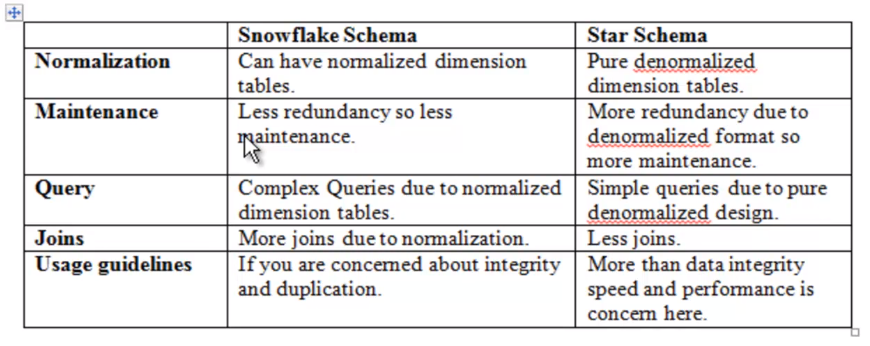

#### Source to Target Mapping

We perform source to target mapping before transferring data from one DB to another. It is used for Master Data Management and ETL processes.

When performing ETL we perform Source-to-target mapping, Define schema, Assign different roles for columns (Dimensions, Facts, outtriggers), We can define different ETL transformation rules for tables like refresh rule, append rule, backup rule, recovery rule etc.,

#### Normalization

Normalization is applied on tables to reduce redundancy and inconsistencies in data. There are 4 forms of Normalization. 1NF, 2NF, 3NF, 4NF.

*1st Normal Form:* 

- Each cell has to be Single Valued.

- Entities in a column are same type.

- Rows should be uniquely identied (User_ID)

*2nd Normal Form*

- Separate columns that dont depend on primary key and form multiple tables out of single table

-  The relation meets 1NF, and there are **No Partial Functional Dependencies**. That is, each non-key attribute is Functionally Dependent on the full Primary Key. For a Partial Functional Dependency to occur, the Primary Key must be a Composite Primary Key. A Composite Primary Key is a Primary Key that consists of 2 or more columns.

*3rd Normal Form*

- All the non primary key columns in the table should depend DIRECTLY on the entire primary key.

- The relation meets 2NF, and there are **No Transitive Functional Dependencies**. A Transitive Functional Dependency is when a non-key column is Functionally Dependent on another non-key column, which is Functionally Dependent on the Primary Key.

### Data Warehouse

Databases focuses on (OLTP) transactions but data warehouse (OLAP) focuses on Data analysis. DataWarehouse is heart of BI used for reporting and analysis.

DataWarehouse is central repository where data arrives from one or more data sources. Data warehousing is technique for collecting data from various data sources

Data is processed, transformed and ingested so that users can access the processed data in Data warehouse through BI tools.

Data warehouse merges information coming from different data sources into comprehensive database. helps for data mining (finding patterns in data).

#### DataWarehousing

Datawarehouse is a Relational Database that is designed for query and analysis rather than for transaction processing. OLTP helps to run the business, Where as OLAP helps to analyze the business. 

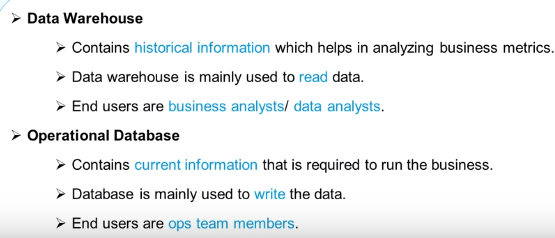


NoSQL databases can deal with structured, semi-structured and unstructured data. Where as RDBMS deals only with structured data. 

When you are dealing with RDBMs, you use ETL operations to move data between OLTP to OLAP (DW).  ETL operation is fixed schema upon creation. You hardcode the set of fields in your ETL processes when you design it. If the underlying structure changes, new data will be either ignored or ETL job breaks.

But when you use NoSQL database, you use ELT, you first load the data, then clean it, merge it with other sources of data, discover patterns in data, and perfrom Statistical analysis on data.

*Transportation* is process of moving data from one system to another. It can be Source to Staging area or Staging area to DataWarehouse. 

Most commong method for transporting data is by using Flatfiles and FTP protocol. We use Flatfiles and FTP bacuse Source and Target may not have similar OS and Database systems.

#### Data Warehouse vs Data Mart

Data Mart is partitioned segment of Data Warehouse. focused on one area of business unit like Finance, Sales, Marketing etc., Data Marts reduce time to perfrom complex queries just to access data they need from datawarehouse.

Data Mart and Data Warehouse are structural repositories used to generate reports. But datawarehouse contains data for entire company and Data Mart contains data for one specific department of business.

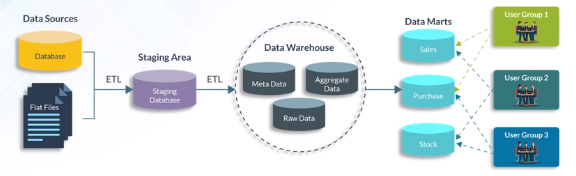

#### Operational Data Store (ODS)

ODS may be source for DW and Data Mart.

*Properties:*

- Contains data from different sources

- Data in ODS is not Raw.

- Does not contain Historical data.

- Contains current version (Active Snapshot of data) while DW contains historical data. 

### Data Lake

While data warehouse stores data in files and folders, data lakes use flat architecture to store data. Each data element in data lake is assigned with unique identifier and tagged with extended meta tags.

It holds the data in unstructured i.e., rawest form - It is not processed or analyzed. Aditionally data lakes accepts and retains data from all data sources all data types and schemas are applied only when data is ready to be used.

## Pentaho

Pentaho is complete BI suite with ETL, Data Modelling and Reporting. It can be integrated with Hadoop and NoSQL databases.

There are different services available in Pentaho

- Pentaho Data Integration (PDI) for ETL

- Metadata Editor - for metadata management.

- Pentaho Report Designer for Reporting (Operational Reporting and AdHoc reporting)

- Pentaho BI - Realtime data analysis, Report Generation.

Within Pentaho Data Integration (PDI) we have different components.

#### SPOON

It is GUI which can be used for Data Modelling, ETL. We create transformations and Jobs in Spoon. 

Transformations are group of 'Data Flow Steps' like reading a file, Filtering, Sorting, Loading etc., They are individually called steps.

Jobs are like workflow models. They aggregate individual pieces of information together to create entire process. EX(Getting FTP files, checking conditions like existing of necessary target tables, running transformations that create tables, emailing error in case of transformation fails)

Transformation (Elementary Data Flow) and Jobs (Execution of sequence of transformations)

#### PAN

CLI utility that executes transformations created on SPOON.

#### KITCHEN

CLI that executes Jobs created on SPOON.

#### CARTE

Simple web server used for running and monitoring data integration tasks.

We use transformations to connect to data sources and Targets, using SPOON we created transformations for Merge JOIN, Data cleaning, Reading files, Sorting, loading into RDBMS

Transformations are about moving and transforming rows from source to target. Jobs are about high level workflow control, executing transformations, sending mails on failure, transferring files via FTP. Another key difference is all steps execute parallel in transformations and all steps execute in order in Jobs.

Using pentaho collecting real time data using MySQL, Oracle, SAP, Salesforce databases to move OLTP data into Amazon Redshift. We also connected pentaho to other legacy systems and ERP tools such as SAP.

## Informatica

Informatica provides solutions for complete data life cycle management. It has different components like,

- `Informatica PowerCenter`: On premise data integration.  

- `Informatica Data Quality (IDQ)`: To maintain quality of the data throughout the process

- `Informatica Cloud Integrator`

- `Informatica Life Cycle Management`: To create applications.

- `Informatica Enterprise Data Integrator`: Integrate data between different organizations.

- `Master data management`

Informatica not only used for ETL but also Data Migration, Application Integration, Data Warehousing etc.,

Informatica PowerCenter has different client tools they are,

- Designer

- Workflow Manager

- Workflow Monitor

- Repository Manager



#### Repository Manager

We create repositories in repository manager. Different teams uses different repositories for their projects. All the files you created like transformations, Sources, mapping, workflows are stored inside repositories. 

#### PowerCenter Designer Client tool

Informatica PowerCenter client tool is used to 

- Load the data from different sources and formats

- Clean the data

- Design the mapping

Within PowerCenter Designer tool we have 5 different workspaces,

1. `Source Analyzer`

2. `Targer Designer`

3. `Mapping Designer`

4. `Mapplet Designer`

5. `Transformation Developer` workspace

Source Analyzer and Targer designer are used to manage different sources and targets in informatica. Source analyzer lets you import different sources. Targer designer lets you create different targets.

Mapping is flow of data from source to target definition through various transformations. Mapping designer consists of different components such as 

1. *Source Definition*: defines source structure

2. *Transformation*: Defines how source data is transformed

3. *Target Definition*: Defines how target data will be loaded.

4. *Links*: Links connect source definition to different transformations and target definition.

#### How to design mapping

Go to repository manager client tool and create repository. Connect to source and target systems using source analyzer and target designer workspaces.

Go to mapping designer workspace and create mapping. Drag and drop sources to the mapping designer workspace to create source definition. Along with source definition there is another tab associated with it. It is called as "Source Qualifier transformation"

Source Qualifier transformation is basic transformation you can see when working with Flat files and Relational Tables. It helps to convert various data types to informatica supported datatypes.

Next create Transformations. The purpose of transformation is to modify the data. There are different types of transformations like

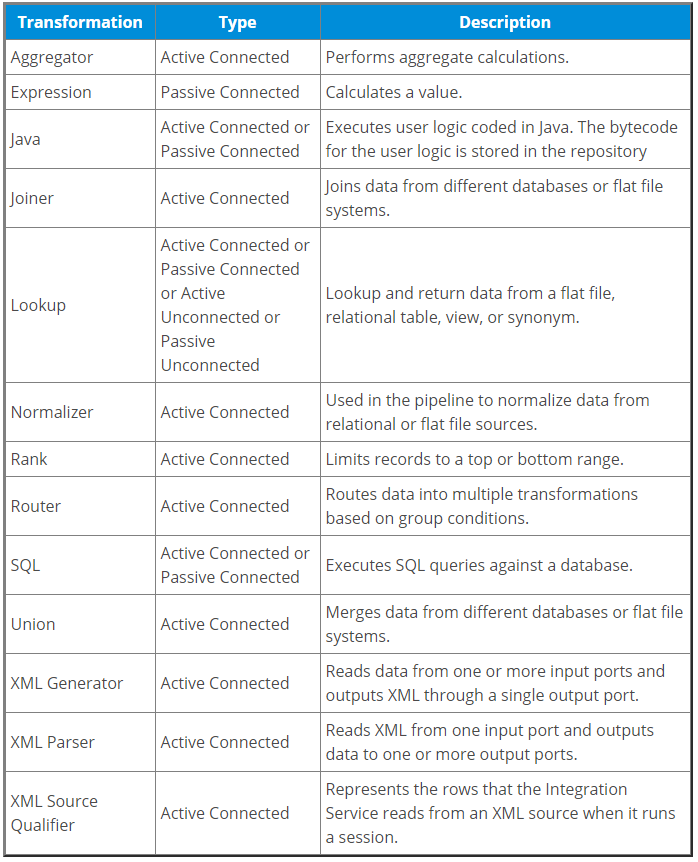

After creating transformations we need to connect transformations for proper data flow. Then go to target definition and load target definition form target folder. Name target definition, select the database where you want to store and click apply.

Before moving data to target, From informatica connect to the target Data Warehouse, create the table to store the data inside the target DW and validate the table by logging into the datawarehouse. Next, connect the transformation to the target definition.

#### Workflow Manager

Till now we created mappings, Just mappings itself dont move the data. We need to create workflows. We create workflows in another client tool called "Workflow Manager".

To create a workflow, Name the workflow, it will create a start icon for you. There are various tasks in workflow manager. 

- Command Task

- Session Task

- Email Task

Session task helps you to associate start icon to mapping. Use links to connect to sessions to mappings. Each session associated with only one mapping. To work with multiple mappings, create multiple sessions. 

In case where output of one mapping will be input for session mapping, In that case sessions will be executed in sequence. In case where third mapping is taking input from 1st and 2nd mapping, In this case sessions will be executed in parallel. 

#### Workflow Monitor

It is a client tool which allows you to monitor the session.

### Transformations in Informatica

We have different applications connected to different databases. In order to analyze data we need to gather the information from various sources, sources might be Salesforce, SAP, Oracle, MySQL, MSSQL Server etc.,

Transformation helps in converting the various formats of the source data to the format of DataWarehouse. Operations like Decoding, Reformatting, time-stamping, Conversion, key generation merging, error detection, locating missing data are done via transformations.

We are extracting data from sources in different formats (XML files, Flatfiles, Relational tables), then we are transforming them into our desired form and loading them into DataWarehouse.

There are various types transformations in Informatica,

- Active

- Passive

- Connected

- Unconnected

*`Connected:`* Type of transformation that is connected to other transformations.

*`Unconnected:`* Not connected to any other transformation in the mapping. It is like an function which is called within other transformations.

*`Active:`* They change the No. of rows of the data that pass through the transformation. (Filter, Source qualifier, Aggregated, Expression)

*`Passive:`* They dont change the No. of rows that pass through the transformations. (format change)

#### Joiner and Union transformation

They both help in joining data from various sources. The only difference is using joiner transformation, you can join only from two sources as long as they have atleast one matching column. But in UNION transformation, you can join No. of sources but they need to have same column name and same data type.

#### Lookup Transformation

Lookup transformation is generally used as unconnected transformation. It can also be used as connected trasformation. The main use of lookup transformation is to lookup certain value from relational table or flat file.

## Informatica Interview Questions

#### Star Schema vs Snowflake Schema

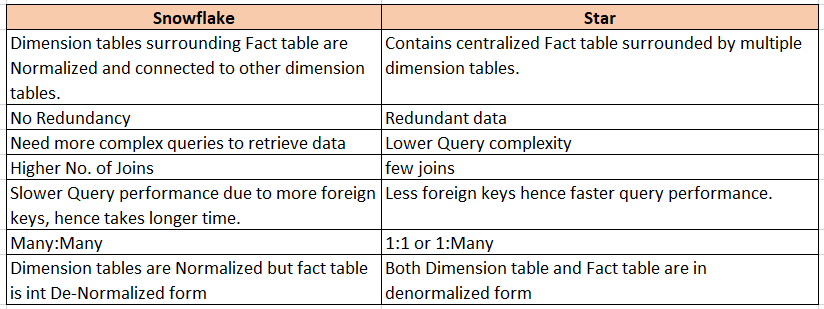

#### Informatica PowerCenter Grid processing and its benefits

You run workflows on Grid. Integration service runs a service process on each available node. Grid processing is a feature of PowerCenter that enables workflows and sessions to be run across multiple domain nodes. Key features of Grid processing are,

- Load Balencing

- High availability

- Dynamic partitioning

#### What is parallel processing and Partitioning in a Session?

Partitioning option increases the performance through parallel data processing. Partition lets you split the large dataset into smaller subsets. They can be processed in parallel to get better session performance.

#### Different ways to implement partioning in Informatica

1. Database partition

2. Round-robin partition

3. Hash autokey partition

4. Hash user-key partition

5. Key range partition

6. Pass through partition

#### Difference between Router and Filter transformation

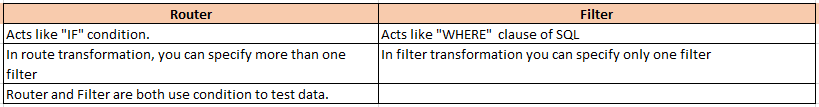

#### What are Mapplets?

Mapplet is a reusable transformation logic that you can use to transform some data before loaded to target.

It is created in Mapplet designer.

It contains set of transformations and lets you reuse transformation logic in multiple mappings.

#### Difference between Mapplet and Mapping

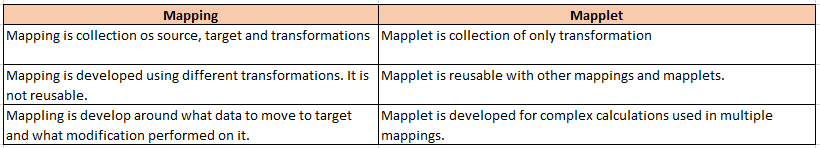

#### Difference between Joining and blending

*`Joining:`* Combining data between two or more tables or sheets within same source is called joining.

*`Blending:`* Combining data from two or more different sources such as oracle, Excel, Sql Server is called blending.

https://bytes.grubhub.com/scaling-etl-how-data-pipelines-evolve-as-your-business-grows-72ff6c744e6e

https://www.infoq.com/articles/batch-etl-streams-kafka/

https://medium.com/abn-amro-developer/abn-amros-data-integration-architecture-f33506a211c3
